<a href="https://colab.research.google.com/github/Dimildizio/WorksOnMyMachine/blob/main/TitanicEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [54]:
ENCODE_COLS = ['Sex', 'Title', 'Deck', 'Embarked']

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/Dimildizio/WorksOnMyMachine/main/data/train.csv", encoding='cp437')
test_data = pd.read_csv("https://raw.githubusercontent.com/Dimildizio/WorksOnMyMachine/main/data/test.csv", encoding='cp437')

In [3]:
print(f'train shape: {train_data.shape}\ntest shape: {test_data.shape}')

train shape: (891, 12)
test shape: (418, 11)


In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
null_counts = pd.DataFrame()
null_counts['Train'] = train_data.isnull().sum()
null_counts['Test'] = test_data.isnull().sum()
null_counts

,Train,Test
PassengerId,0,0.0
Survived,0,NaN
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,86.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,1.0


In [7]:
print(pd.concat([train_data.drop('Survived',axis=1)['Name'], test_data['Name']], axis=0).nunique() - (train_data.shape[0]+test_data.shape[0]))

-2


In [8]:
pd.concat([train_data[train_data['Name'].isin(test_data['Name'])], test_data[test_data['Name'].isin(train_data['Name'])]])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
6,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [9]:
train_data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [10]:
train_data.groupby(['Parch', 'Survived'])['Survived'].count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [11]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [12]:
train_data.groupby(['Embarked', 'Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [13]:
train_data[train_data['Ticket'].duplicated()].sort_values(by='Ticket').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.00,A14,S


In [14]:
test_data[test_data['Ticket'].duplicated()].sort_values(by='Ticket').head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
402,1294,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.40,NaN,C
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.50,C132,C
218,1110,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1,1,113503,211.50,C80,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.50,C80,C
306,1198,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S


In [15]:
print('Test titles:', test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()).unique())
print('Train title:', train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()).unique())

Test titles: ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']
Train title: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [16]:
test_data[test_data['Name'].str.contains('|'.join(['Dona']))]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
239,1131,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,PC 17761,106.425,C86,C
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900,C105,C


In [125]:
correlation = train_data['Age'].corr(train_data['Survived'])
print("Correlation between Age and Survived:", correlation)

Correlation between Age and Survived: -0.07722109457217768


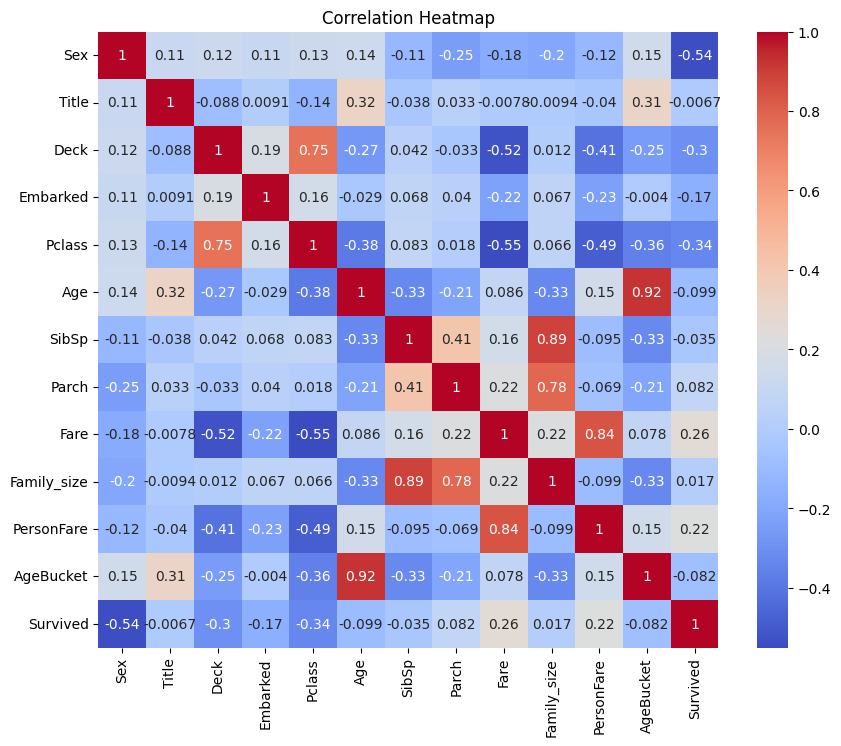

In [127]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Predict age NaNs

In [159]:
def create_encoder(data):
    encoders = {}
    encoded = data.copy()
    for col in encoded.columns:
      encoder = LabelEncoder()
      encoded[col] = encoder.fit_transform(encoded[col])
      encoders[col] = encoder
    with open('encoders.pk1', 'wb') as f:
        pickle.dump(encoders, f)
    return encoded


def load_encoder(data):
    with open('encoders.pk1', 'rb') as f:
      encoders = pickle.load(f)
    for col, le in encoders.items():
      data[col] = le.transform(data[col])
    return data


def train_encoder(cols = ENCODE_COLS):
    train = train_data.copy()
    test = test_data.copy()
    df1 = pd.concat([train.drop('Survived', axis=1), test], axis=0)
    df1 = apply_cols(df1)

    part_1 = df1[cols]
    part_2 = df1.drop(cols, axis=1)

    part_1_encoded = create_encoder(part_1)
    df1 = pd.concat([part_1_encoded, part_2], axis=1)
    return df1


def prepare(data):
  return load_encoder(apply_cols(data))


def predict_age_model():
  train = train_data.copy().drop('Survived', axis=1)
  test = test_data.copy()
  train = prepare(train)
  test = prepare(test)

  together = pd.concat([train, test], axis=0).dropna(subset=['Age'])
  y = together['Age']
  X = together.drop('Age', axis=1)

  model = RandomForestRegressor()
  model.fit(X, y)

  test = age_pred(model, test)
  train = age_pred(model, train)
  train['Survived'] = train_data['Survived']
  return (train, test)

def age_pred(model, data):
  missing = data['Age'].isnull()
  y_pred = model.predict(data.loc[missing].drop(['Age'], axis=1))
  data.loc[missing, 'Age'] = y_pred
  return data


In [164]:
df11 = train_encoder()
df_n, df_t = predict_age_model()

change_dtypes(df_n).head()  #float to int mostly

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,PersonFare,Deck,Survived
0,3,1,22,1,0,7,2,1,2,3.625000,8,0
1,1,0,38,1,0,71,0,2,2,35.656250,2,1
2,3,0,26,0,0,7,2,0,1,7.925781,8,1
3,1,0,35,1,0,53,2,2,2,26.546875,2,1
4,3,1,35,0,0,8,2,1,1,8.046875,8,0


## Modify columns

In [55]:
def change_dtypes(df):
  for column in df.columns:
      if column == 'PersonFare':
        df[column] = df[column].astype('float16')
      elif df[column].dtype == 'int64' or df[column].dtype == 'float64':
          df[column] = df[column].astype('int16')
      elif df[column].dtype == 'object':
        df[column] = df[column].astype('category')
  return df


def get_title(df):
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
  df['Title'] = df['Title'].replace(['Dr', 'Col', 'Sir', 'Major', 'Master'], 'Mr')
  df['Title'] = df['Title'].replace(['Capt', 'Don', 'Jonkheer'], 'Rev')
  df['Title'] = df['Title'].replace(['Ms', 'Lady', 'Mlle', 'Countess', 'Mme', 'Dona'], 'Rev_fem')
  return df


def get_family(df):
  df['Family_size'] = df['Parch']+df['SibSp'] + 1
  return df


def get_deck(df):
  df['Cabin'].fillna('Z', inplace=True)
  df['Deck'] = df['Cabin'].str.extract(r'([A-Za-z]+)')
  return df


def drop_useless(df):
  df = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
  return df


def get_age_buckets(df):
  #labels are 'Child', 'Young Adult', 'Adult', 'Senior'
  df['AgeBucket'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 80], labels=[1,2,3,4])
  #print('empty buckets:', df[df['AgeBucket'].isna()])
  df['AgeBucket'] = df['AgeBucket'].astype('int16')
  return df


def get_fare_per_person(df):
  df['PersonFare'] = df['Fare'] / df['Family_size']
  return df


def last_y(df):
    survived = df['Survived']
    df = df.drop('Survived', axis=1)
    df['Survived'] = survived
    return df

def fill_na(df):
  df['Fare'].fillna(df['Fare'].mean(), inplace=True)
  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
  return df

def apply_cols(df):
  for func in [fill_na, get_title, get_family, get_fare_per_person, get_deck, drop_useless]:
    df = func(df)
  return df

def apply_all(data, y=False):
  df = data.copy()
  for func in [fill_na, get_title, get_family, get_fare_per_person, get_deck,
               drop_useless, predict_age, get_age_buckets, change_dtypes]:
    df = func(df)
  if y:
    df = last_y(df)
  return df

In [30]:
age_stats = df.groupby('AgeBucket')['Age'].describe()
age_stats

,count,mean,std,min,25%,50%,75%,max
AgeBucket,,,,,,,,
1,159.0,10.754717,6.236598,0.0,4.50,11.0,17.0,18.0
2,346.0,24.658960,3.503935,19.0,22.00,25.0,28.0,30.0
3,314.0,38.191083,5.878029,30.0,33.00,37.0,42.0,50.0
4,72.0,58.263889,6.348989,51.0,53.75,57.0,62.0,80.0


In [31]:
data_info = pd.concat([test_df.dtypes, test_df.nunique()], axis=1)
data_info.columns = ['Datatype', 'Unique_num']
data_info

,Datatype,Unique_num
Sex,int16,2
Title,int16,5
Deck,int16,8
Embarked,int16,3
Pclass,int16,3
Age,int16,64
SibSp,int16,7
Parch,int16,8
Fare,int16,77
Family_size,int16,9


In [32]:
df.describe()

,Sex,Title,Deck,Embarked,Pclass,Age,SibSp,Parch,Fare,Family_size,PersonFare,AgeBucket,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,0.976431,6.716049,1.536476,2.308642,29.662177,0.523008,0.381594,31.785634,1.904602,19.921875,2.335578,0.383838
std,0.477990,0.667466,2.460739,0.791503,0.836071,13.873478,1.102743,0.806057,49.703730,1.613459,inf,0.861578,0.486592
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,8.000000,1.000000,2.000000,21.000000,0.000000,0.000000,7.000000,1.000000,7.250000,2.000000,0.000000
50%,1.000000,1.000000,8.000000,2.000000,3.000000,28.000000,0.000000,0.000000,14.000000,1.000000,8.296875,2.000000,0.000000
75%,1.000000,1.000000,8.000000,2.000000,3.000000,37.000000,1.000000,0.000000,31.000000,2.000000,23.671875,3.000000,1.000000
max,1.000000,4.000000,8.000000,2.000000,3.000000,80.000000,8.000000,6.000000,512.000000,11.000000,512.500000,4.000000,1.000000


In [34]:
df.head()

,Sex,Title,Deck,Embarked,Pclass,Age,SibSp,Parch,Fare,Family_size,PersonFare,AgeBucket,Survived
0,1,1,8,2,3,22,1,0,7,2,3.625000,2,0
1,0,2,2,0,1,38,1,0,71,2,35.656250,3,1
2,0,0,8,2,3,26,0,0,7,1,7.925781,2,1
3,0,2,2,2,1,35,1,0,53,2,26.546875,3,1
4,1,1,8,2,3,35,0,0,8,1,8.046875,3,0


## IQR and outliers

# Get results

In [33]:
ids = test_data['PassengerId']